<a href="https://colab.research.google.com/github/kdrksml/NYC-Airbnb-opendata/blob/main/NYC_OpenData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AB_NYC_2019.csv')

# the first few rows of the DataFrame
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [18]:
# Basic statistics about numerical columns in the dataset
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [7]:
# missing values in the dataset
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [111]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

# Get data types of each column
data_types = df.dtypes

# Display data summary
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Data types:")
print(data_types)



Number of rows: 48895
Number of columns: 16
Data types:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [113]:
# Top hosts with the most listings
top_hosts = df['host_id'].value_counts().head()

# Top neighborhoods with the most listings available
top_neighborhoods = df['neighbourhood'].value_counts().head()

# Display top hosts and neighborhoods
print("Top hosts:")
print(top_hosts)
print("\nTop neighborhoods:")
print(top_neighborhoods)

Top hosts:
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

Top neighborhoods:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64


In [115]:
# Calculate average price for each neighborhood
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()

# Display average price by neighborhood
print(avg_price_by_neighborhood)

neighbourhood
Allerton            87.595238
Arden Heights       67.250000
Arrochar           115.000000
Arverne            171.779221
Astoria            117.187778
                      ...    
Windsor Terrace    138.993631
Woodhaven           67.170455
Woodlawn            60.090909
Woodrow            700.000000
Woodside            85.097872
Name: price, Length: 221, dtype: float64


In [117]:
# Listings with the highest number of reviews
most_reviewed_listings = df.nlargest(5, 'number_of_reviews')

# Display most reviewed listings
print(most_reviewed_listings[['name', 'number_of_reviews']])

                                 name  number_of_reviews
11759         Room near JFK Queen Bed                629
2031       Great Bedroom in Manhattan                607
2030   Beautiful Bedroom in Manhattan                597
2015     Private Bedroom in Manhattan                594
13495         Room Near JFK Twin Beds                576


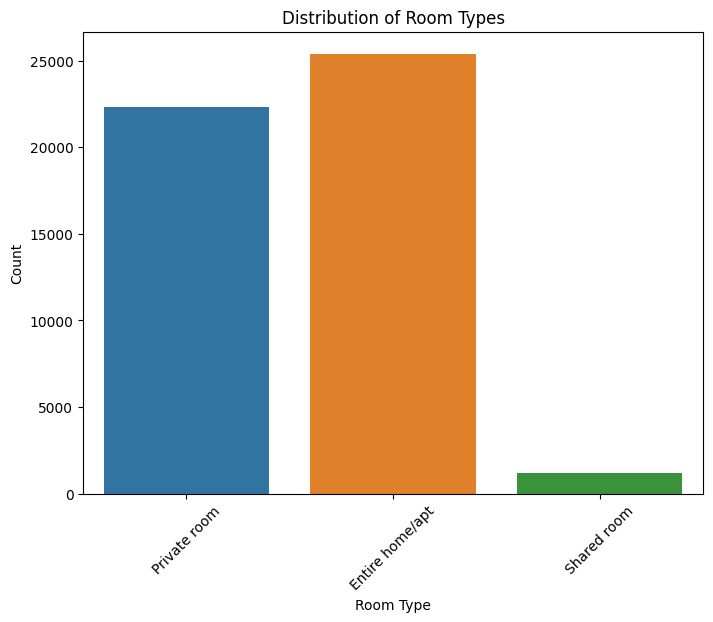

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

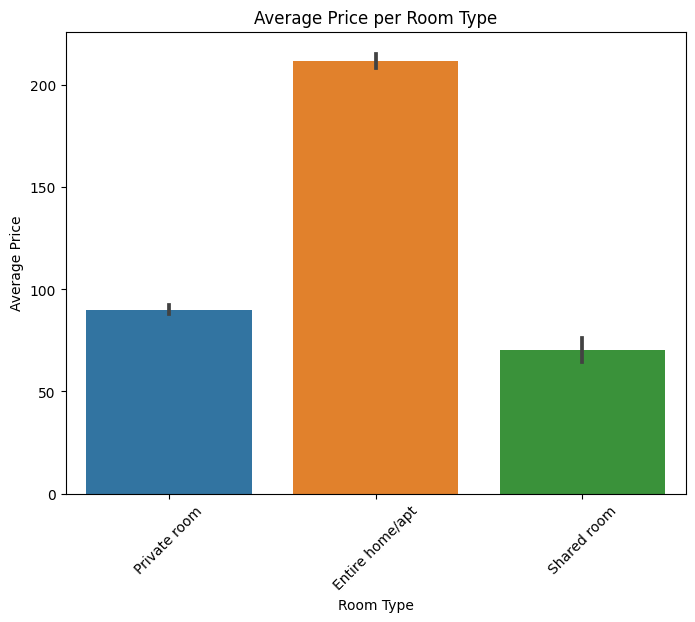

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=df)
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

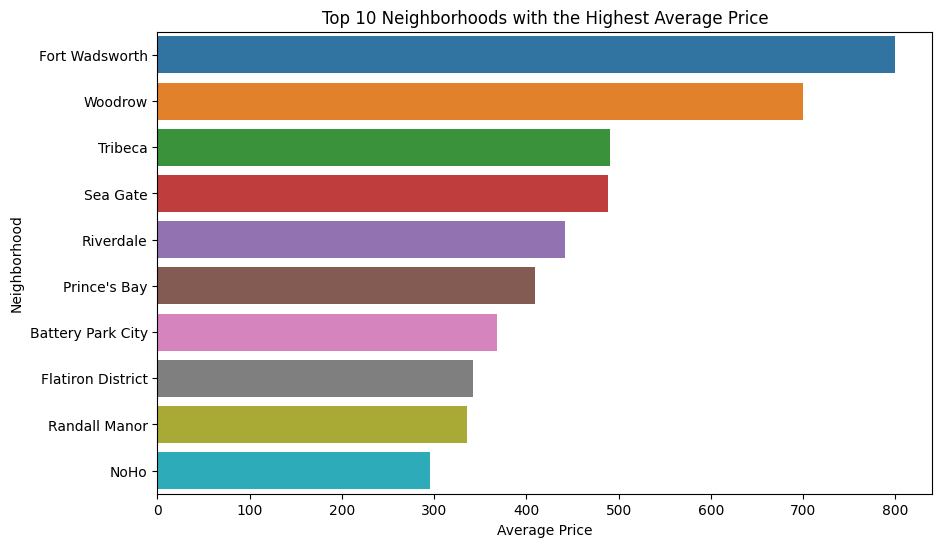

In [12]:
# Calculating the average price for each neighborhood
neighborhood_avg_price = df.groupby('neighbourhood')['price'].mean().reset_index()
top_10_neighborhoods = neighborhood_avg_price.nlargest(10, 'price')

# Plotting the top 10 neighborhoods with the highest average price
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighbourhood', data=top_10_neighborhoods)
plt.title('Top 10 Neighborhoods with the Highest Average Price')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


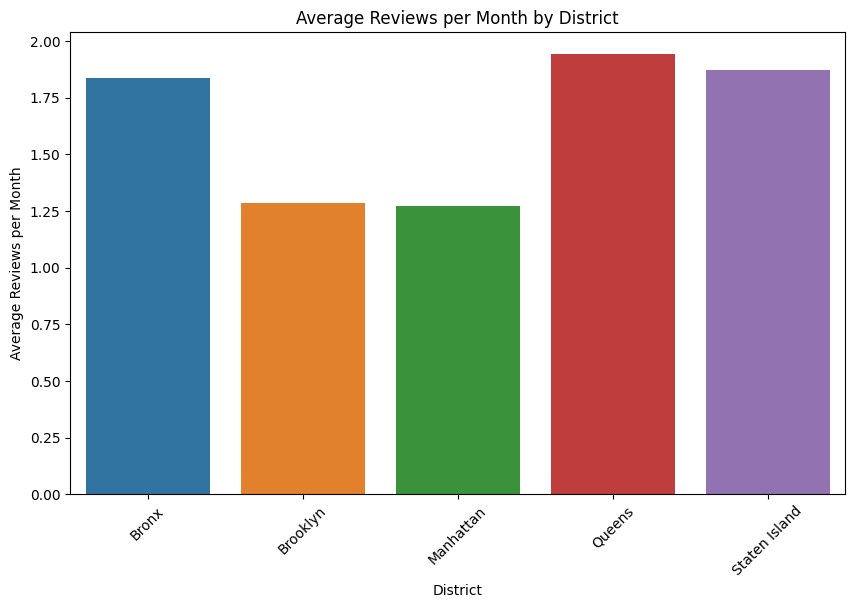

In [86]:


state_reviews = df.groupby('neighbourhood_group')['reviews_per_month'].mean().reset_index()

# Plotting the average reviews per month for each state
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='reviews_per_month', data=state_reviews)
plt.title('Average Reviews per Month by District')
plt.xlabel('District')
plt.ylabel('Average Reviews per Month')
plt.xticks(rotation=45)
plt.show()

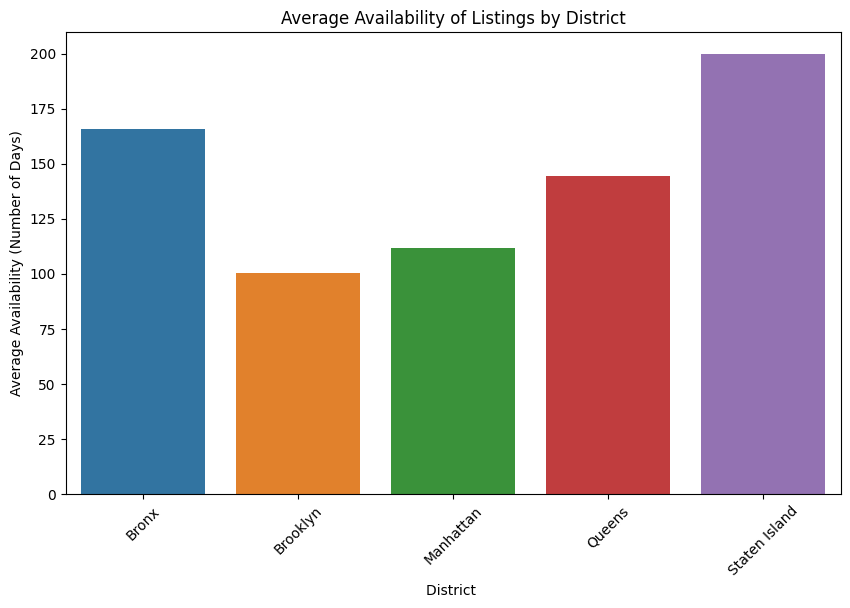

In [87]:

district_avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# Plotting the average availability for each district
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='availability_365', data=district_avg_availability)
plt.title('Average Availability of Listings by District')
plt.xlabel('District ')
plt.ylabel('Average Availability (Number of Days)')
plt.xticks(rotation=45)
plt.show()

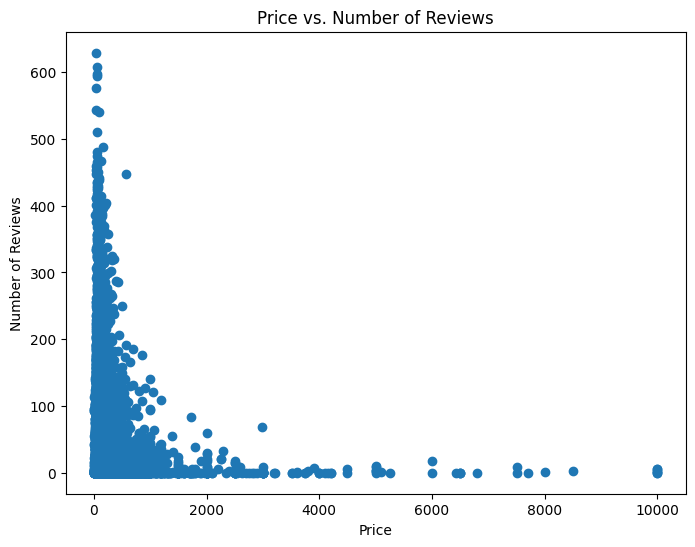

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['number_of_reviews'])
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

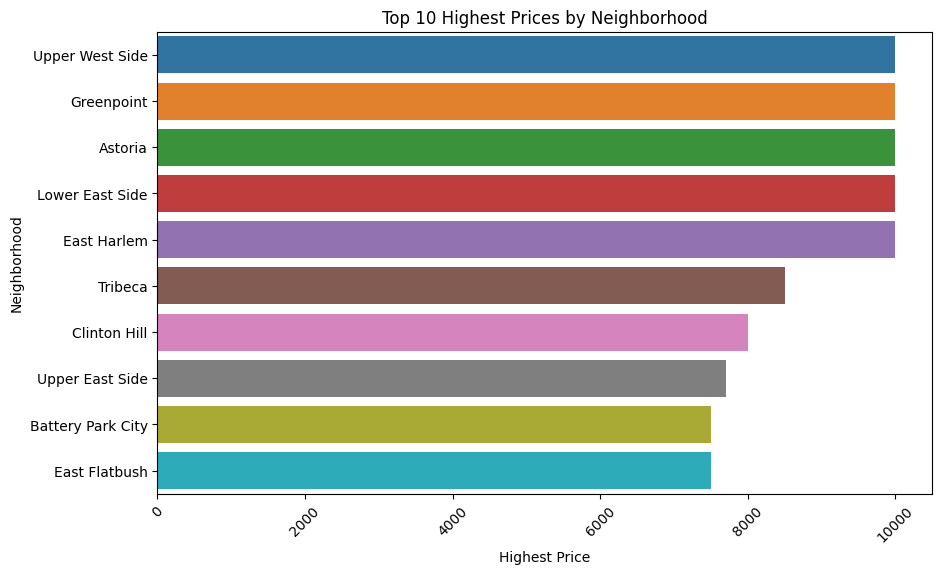

In [93]:

highest_prices_neighborhood = df.groupby('neighbourhood')['price'].max().reset_index()

# Sorting the data by highest price in descending order
highest_prices_neighborhood = highest_prices_neighborhood.sort_values(by='price', ascending=False)

# Selecting the top 10 neighborhoods with the highest prices
top_10_highest_prices = highest_prices_neighborhood.nlargest(10, 'price')

# Plotting the top 10 highest prices by neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighbourhood', data=top_10_highest_prices)
plt.title('Top 10 Highest Prices by Neighborhood')
plt.xlabel('Highest Price')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

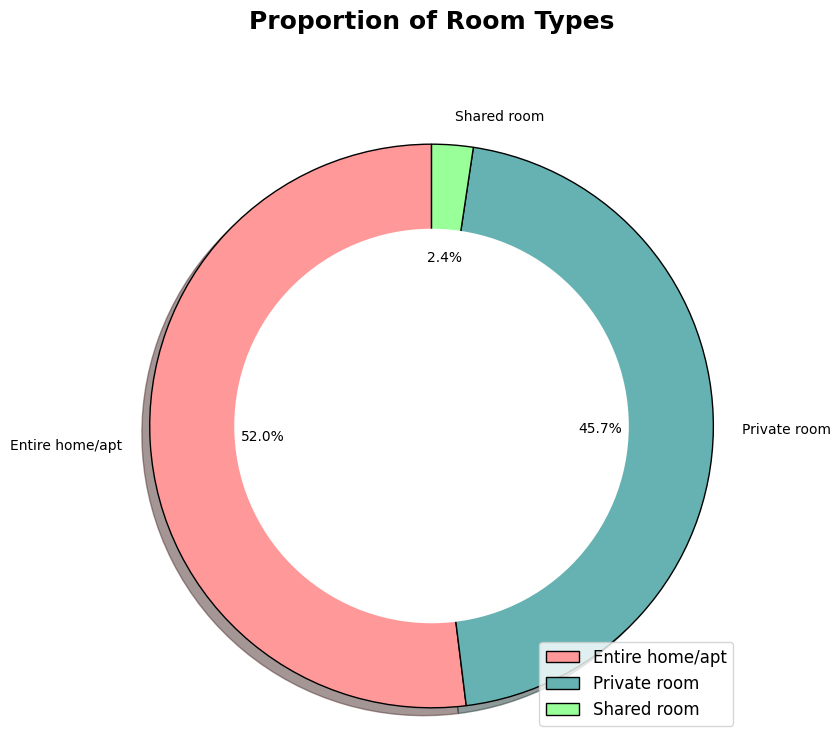

In [39]:
# Calculating the room type counts
room_type_counts = df['room_type'].value_counts()

# Defining custom colors for the pie chart
colors = ['#FF9999', '#66B2B2', '#99FF99', '#B2B266']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Room Types', fontsize=18, fontweight='bold', pad=20, y=1.1)
plt.axis('equal')


plt.legend(loc='best', labels=room_type_counts.index, fontsize=12)

# Adding a shadow to the pie chart and set edge color to black for better visibility
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))


plt.show()

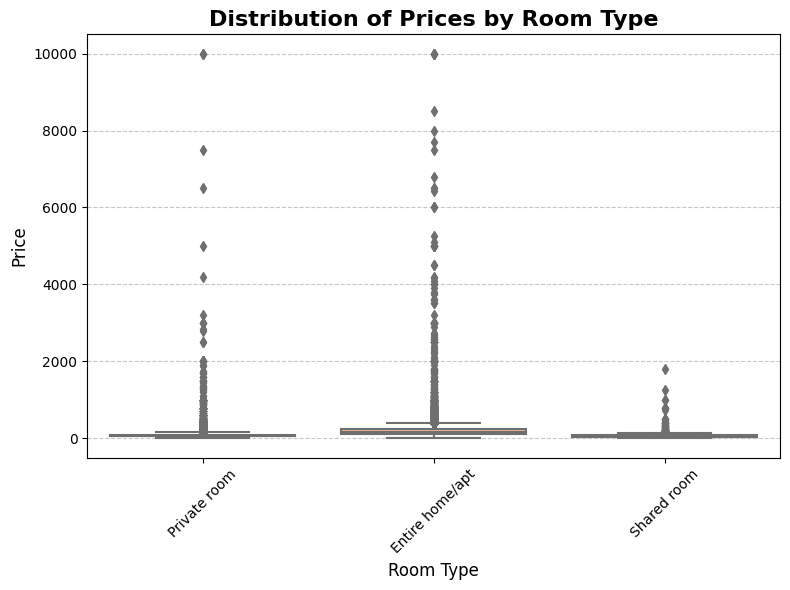

In [41]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='pastel')
plt.title('Distribution of Prices by Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

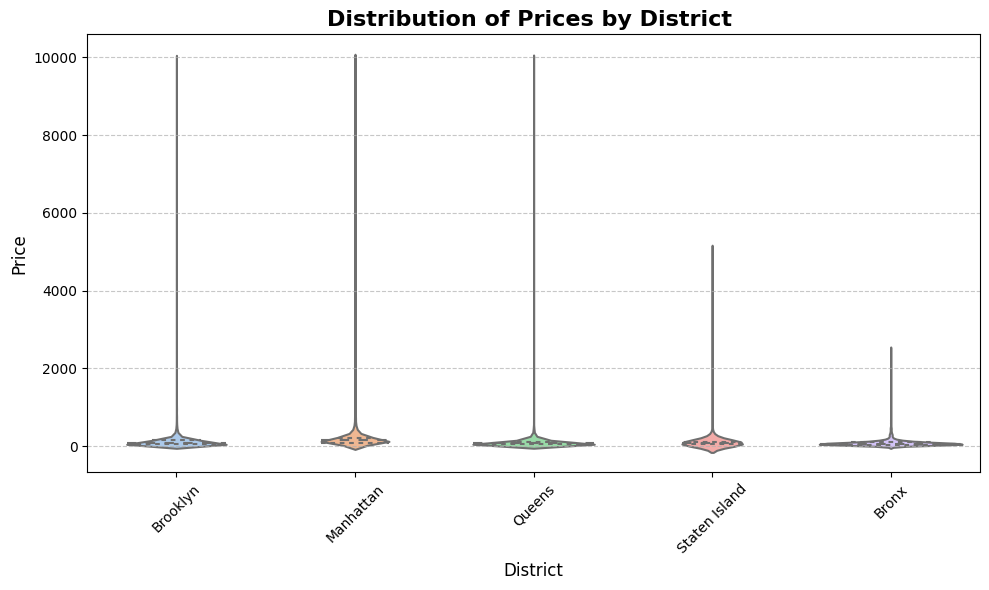

In [84]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=df, palette='pastel', inner='quartile')
plt.title('Distribution of Prices by District ', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-46-e0b22a33b985>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['room_type'] == room_type]['price'], label=room_type, shade=True, linewidth=2)
<ipython-input-46-e0b22a33b985>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['room_type'] == room_type]['price'], label=room_type, shade=True, linewidth=2)
<ipython-input-46-e0b22a33b985>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['room_type'] == room_type]['price'], label=room_type, shade=True, linewidth=2)


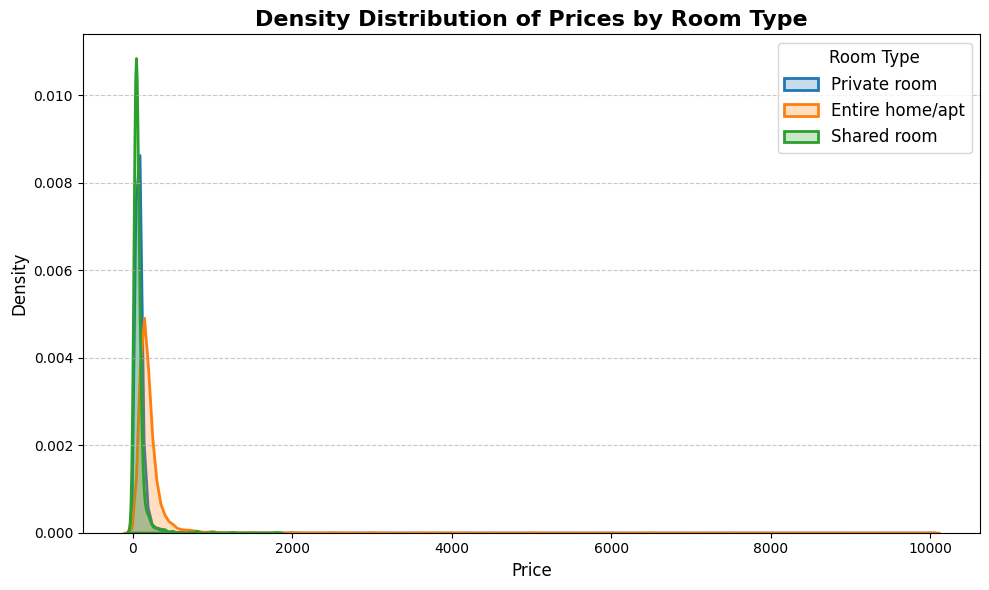

In [46]:
plt.figure(figsize=(10, 6))
for room_type in df['room_type'].unique():
    sns.kdeplot(df[df['room_type'] == room_type]['price'], label=room_type, shade=True, linewidth=2)
plt.title('Density Distribution of Prices by Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Room Type', fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

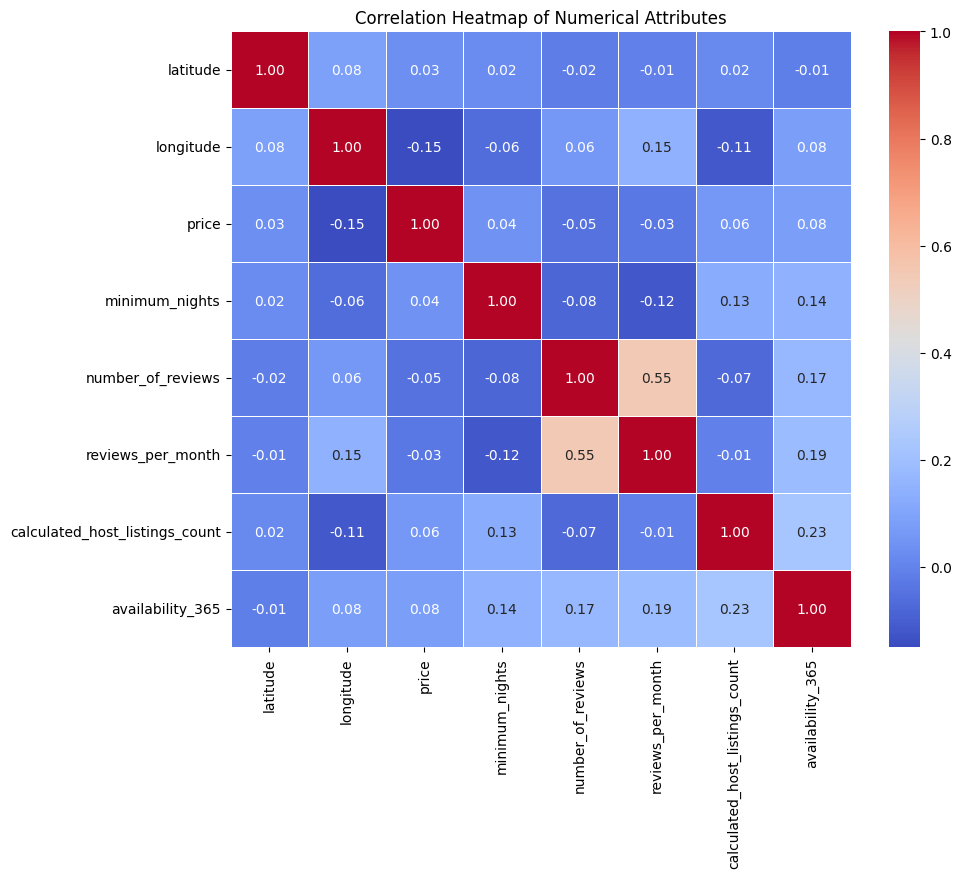

In [49]:
# Select the numerical attributes for the heatmap
numerical_attributes = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Create a correlation matrix
correlation_matrix = df[numerical_attributes].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

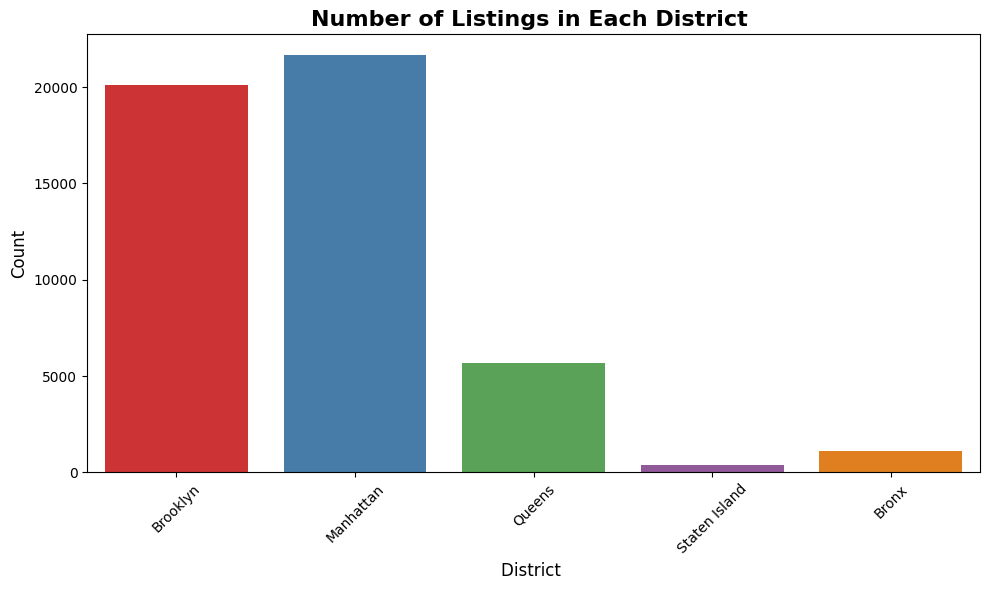

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, palette='Set1')
plt.title('Number of Listings in Each District ', fontsize=16, fontweight='bold')
plt.xlabel('District ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
import folium
import random

# Create a map centered on the average latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=9)

# Find the highest priced listing in each district (neighbourhood_group)
highest_prices = df.groupby('neighbourhood_group')['price'].idxmax()
highest_price_listings = df.loc[highest_prices]

# Generate a random color for each district
district_colors = {}
for district_name in highest_price_listings['neighbourhood_group'].unique():
    district_colors[district_name] = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Add a circle marker for each highest priced listing in each district
for index, row in highest_price_listings.iterrows():
    district_name = row['neighbourhood_group']  # Get the district name
    marker_color = district_colors[district_name]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=marker_color,  # Use the generated random color for each district
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=f"{row['name']}"  # The popup shows the property name only
    ).add_to(m)

# Add a custom legend with district names and corresponding markers
legend_html = '''
     <div style="position: fixed;
                 bottom: 60px; left: 50px; width: 120px; height: 130px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; opacity:0.8;">
     &nbsp; <b>Districts</b> <br>
'''

for district_name, color in district_colors.items():
    legend_html += f'&nbsp; <i class="fa fa-circle" style="color:{color}"></i> {district_name} <br>'

legend_html += '''
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Highest Priced Listing in Each District</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m